#  MHLoss

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Activation

##  Dataset Preparation

In [12]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


Now, let's visualize the dataset...

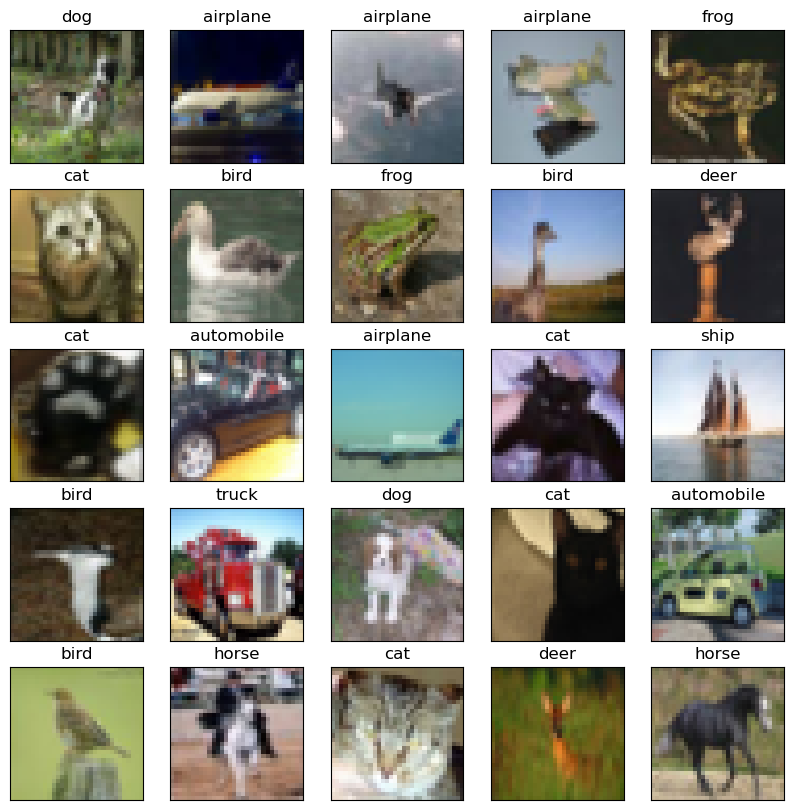

In [13]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    index = np.random.randint(len(X_train))
    plt.imshow(X_train[index])
    plt.title(classes[y_train[index].argmax()])
    plt.xticks([])
    plt.yticks([])
plt.show()

##  Model

First, let's define the baseline model.

In [14]:
def buildModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='elu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='elu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10))
    return model


Now, let's build the baseline model...

In [25]:
model_baseline = buildModel()
model_baseline.add(Activation('softmax'))
model_baseline.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_baseline.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

Let's train it...

In [26]:
epoochs = 20
batch_size = 64
history_baseline = model_baseline.fit(X_train, y_train, epochs=epoochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/20


2023-04-10 09:57:35.671039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.3349 - accuracy: 0.5341

2023-04-10 09:58:55.642058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 88s 109ms/step - loss: 1.3349 - accuracy: 0.5341 - val_loss: 1.0494 - val_accuracy: 0.6385
Epoch 2/20
782/782 [==============================] - 92s 117ms/step - loss: 0.9885 - accuracy: 0.6606 - val_loss: 1.0045 - val_accuracy: 0.6537
Epoch 3/20
782/782 [==============================] - 92s 118ms/step - loss: 0.8816 - accuracy: 0.6982 - val_loss: 0.9175 - val_accuracy: 0.6912
Epoch 4/20
782/782 [==============================] - 101s 129ms/step - loss: 0.7963 - accuracy: 0.7276 - val_loss: 0.9193 - val_accuracy: 0.6950
Epoch 5/20
782/782 [==============================] - 96s 123ms/step - loss: 0.7267 - accuracy: 0.7517 - val_loss: 0.8931 - val_accuracy: 0.7046
Epoch 6/20
782/782 [==============================] - 92s 118ms/step - loss: 0.6693 - accuracy: 0.7711 - val_loss: 0.9230 - val_accuracy: 0.7015
Epoch 7/20
782/782 [==============================] - 92s 117ms/step - loss: 0.6117 - accuracy: 0.7900 - val_loss: 0.9301 - val_accuracy: 0.

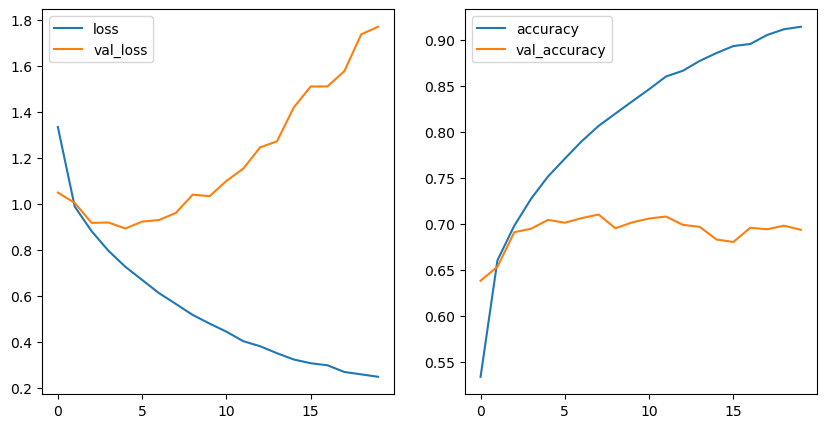

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['loss'], label='loss')
plt.plot(history_baseline.history['val_loss'], label='val_loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['accuracy'], label='accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

Now, let's define the multi-label model...

In [35]:
model = buildModel()
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'categorical_crossentropy'])

In [37]:
history = model.fit(X_train, y_train, epochs=epoochs, batch_size=batch_size, validation_data=(X_test, y_test), class_weight={i: 10 for i in range(10)})

Epoch 1/20


2023-04-10 16:45:04.057293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 2.3356 - accuracy: 0.4901 - categorical_crossentropy: 1.4617

2023-04-10 16:46:45.645955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 110s 138ms/step - loss: 2.3356 - accuracy: 0.4901 - categorical_crossentropy: 1.4617 - val_loss: 0.1950 - val_accuracy: 0.6097 - val_categorical_crossentropy: 1.1437
Epoch 2/20
782/782 [==============================] - 106s 135ms/step - loss: 1.7892 - accuracy: 0.6480 - categorical_crossentropy: 1.0475 - val_loss: 0.1769 - val_accuracy: 0.6549 - val_categorical_crossentropy: 1.0427
Epoch 3/20
782/782 [==============================] - 105s 134ms/step - loss: 1.5992 - accuracy: 0.6985 - categorical_crossentropy: 0.9182 - val_loss: 0.1621 - val_accuracy: 0.6981 - val_categorical_crossentropy: 0.9367
Epoch 4/20
782/782 [==============================] - 105s 135ms/step - loss: 1.4664 - accuracy: 0.7294 - categorical_crossentropy: 0.8276 - val_loss: 0.1589 - val_accuracy: 0.7033 - val_categorical_crossentropy: 0.9322
Epoch 5/20
782/782 [==============================] - 105s 135ms/step - loss: 1.3617 - accuracy: 0.7565 - categorical_crossentropy:

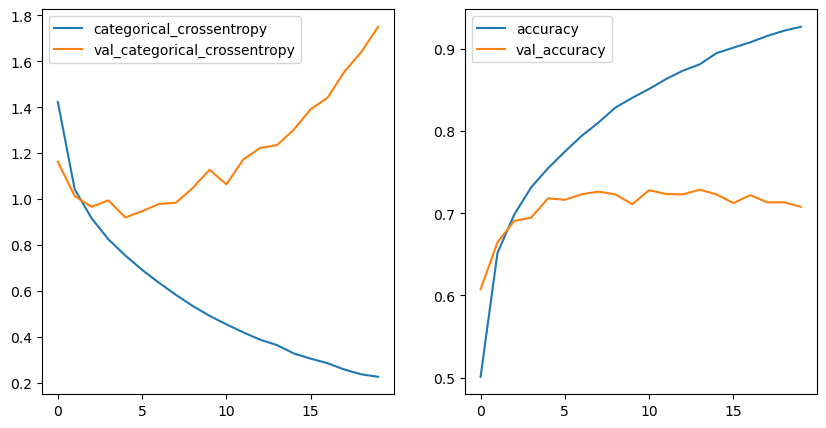

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_crossentropy'], label='categorical_crossentropy')
plt.plot(history.history['val_categorical_crossentropy'], label='val_categorical_crossentropy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()